In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../cluster_mpg.csv')
df_dummies = pd.get_dummies(df.drop('name', axis=1))
df_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
388,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
389,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
390,28.0,4,120.0,79.0,2625,18.6,82,False,False,True


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sacled_data = scaler.fit_transform(df_dummies)
scaled_df = pd.DataFrame(data=sacled_data,columns=df_dummies.columns)
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


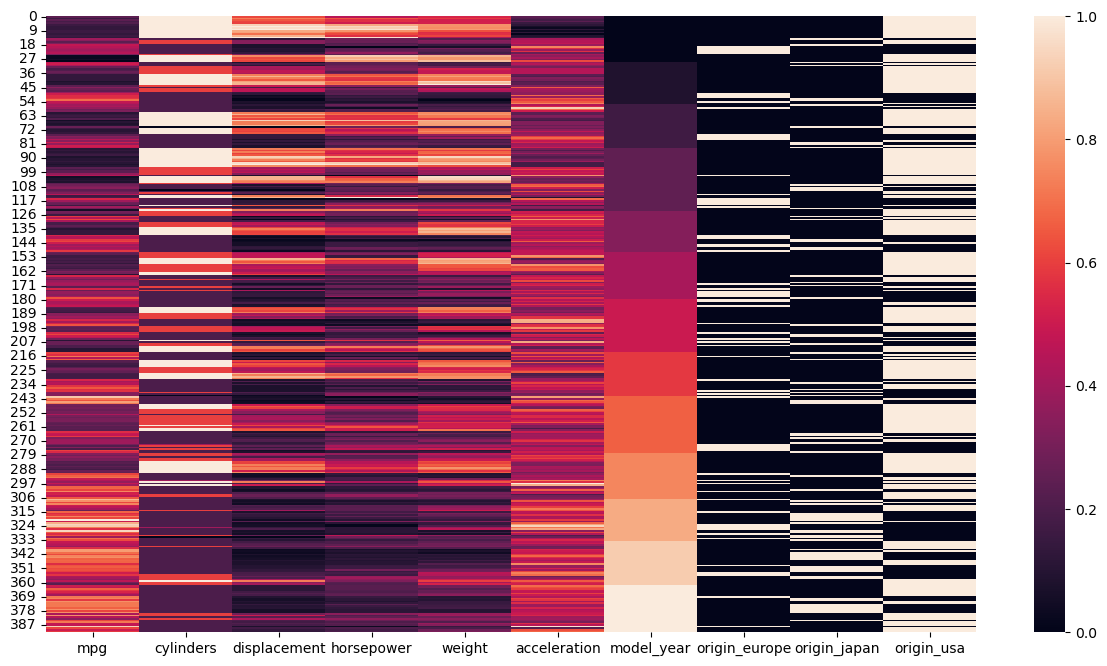

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(data=scaled_df)
plt.show()

<Figure size 1500x800 with 0 Axes>

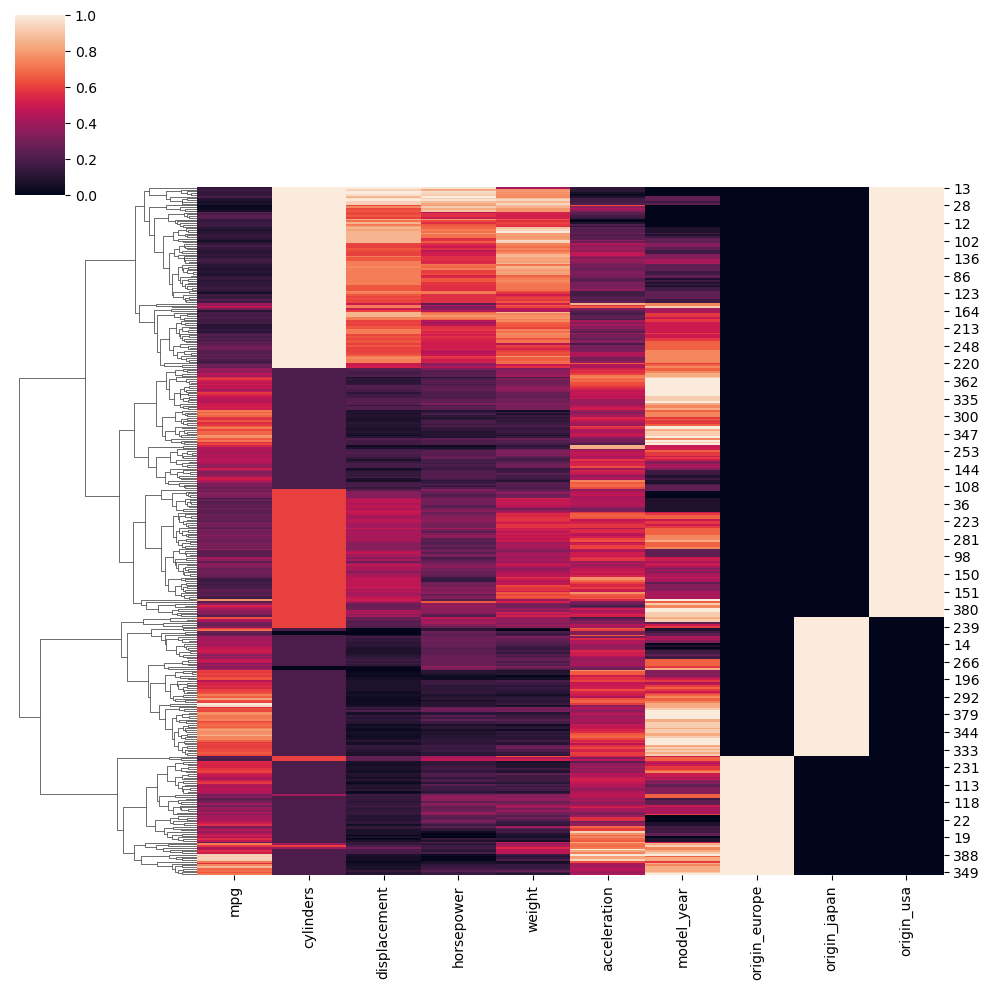

In [5]:
plt.figure(figsize=(15,8))
sns.clustermap(data=scaled_df,col_cluster=False)
plt.show()

<Figure size 1500x800 with 0 Axes>

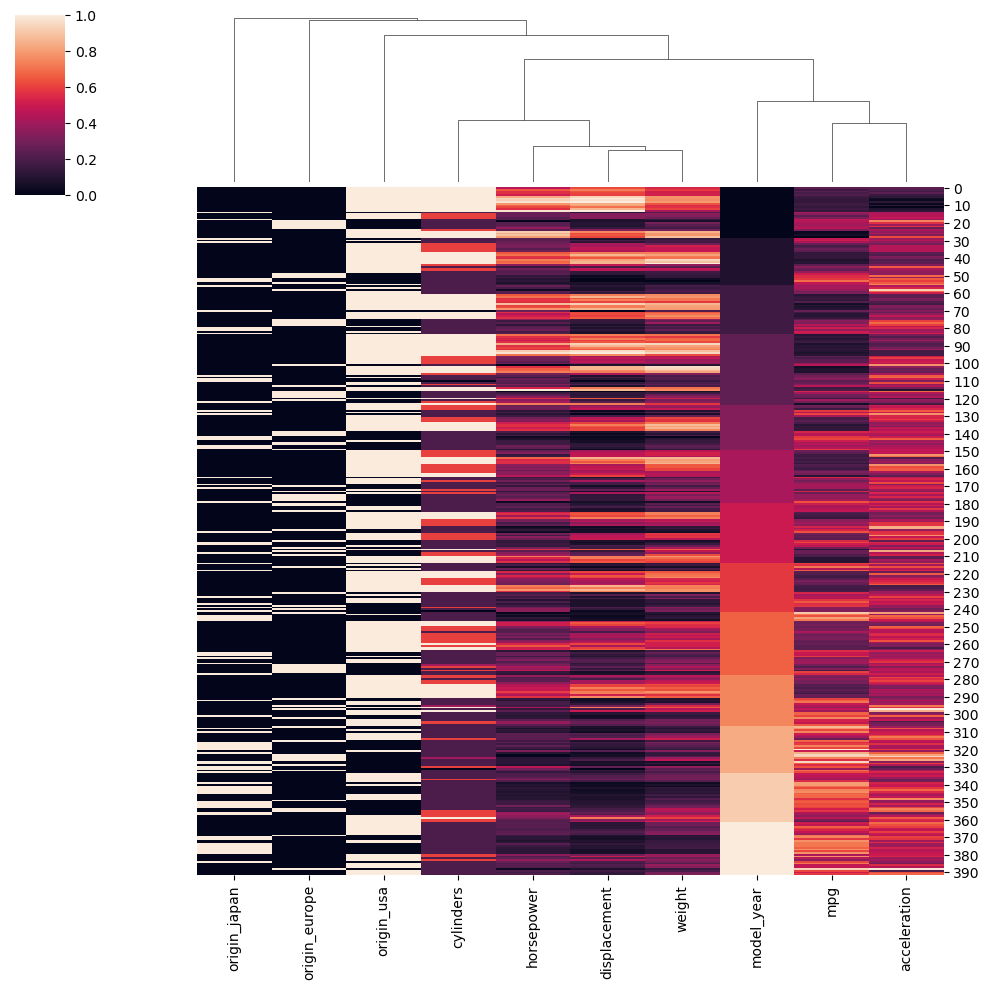

In [7]:
plt.figure(figsize=(15,8))
sns.clustermap(data=scaled_df,row_cluster=False)
plt.show()

In [8]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


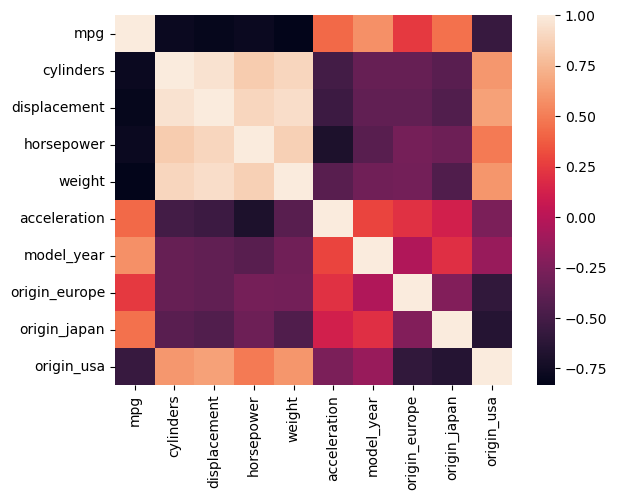

In [9]:
sns.heatmap(data=scaled_df.corr())
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

In [11]:
scaled_df['cluster_label'] = cluster_labels
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,cluster_label
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0,1
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0,1
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0,1
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0,1
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0,0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0,2
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0,0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0,0


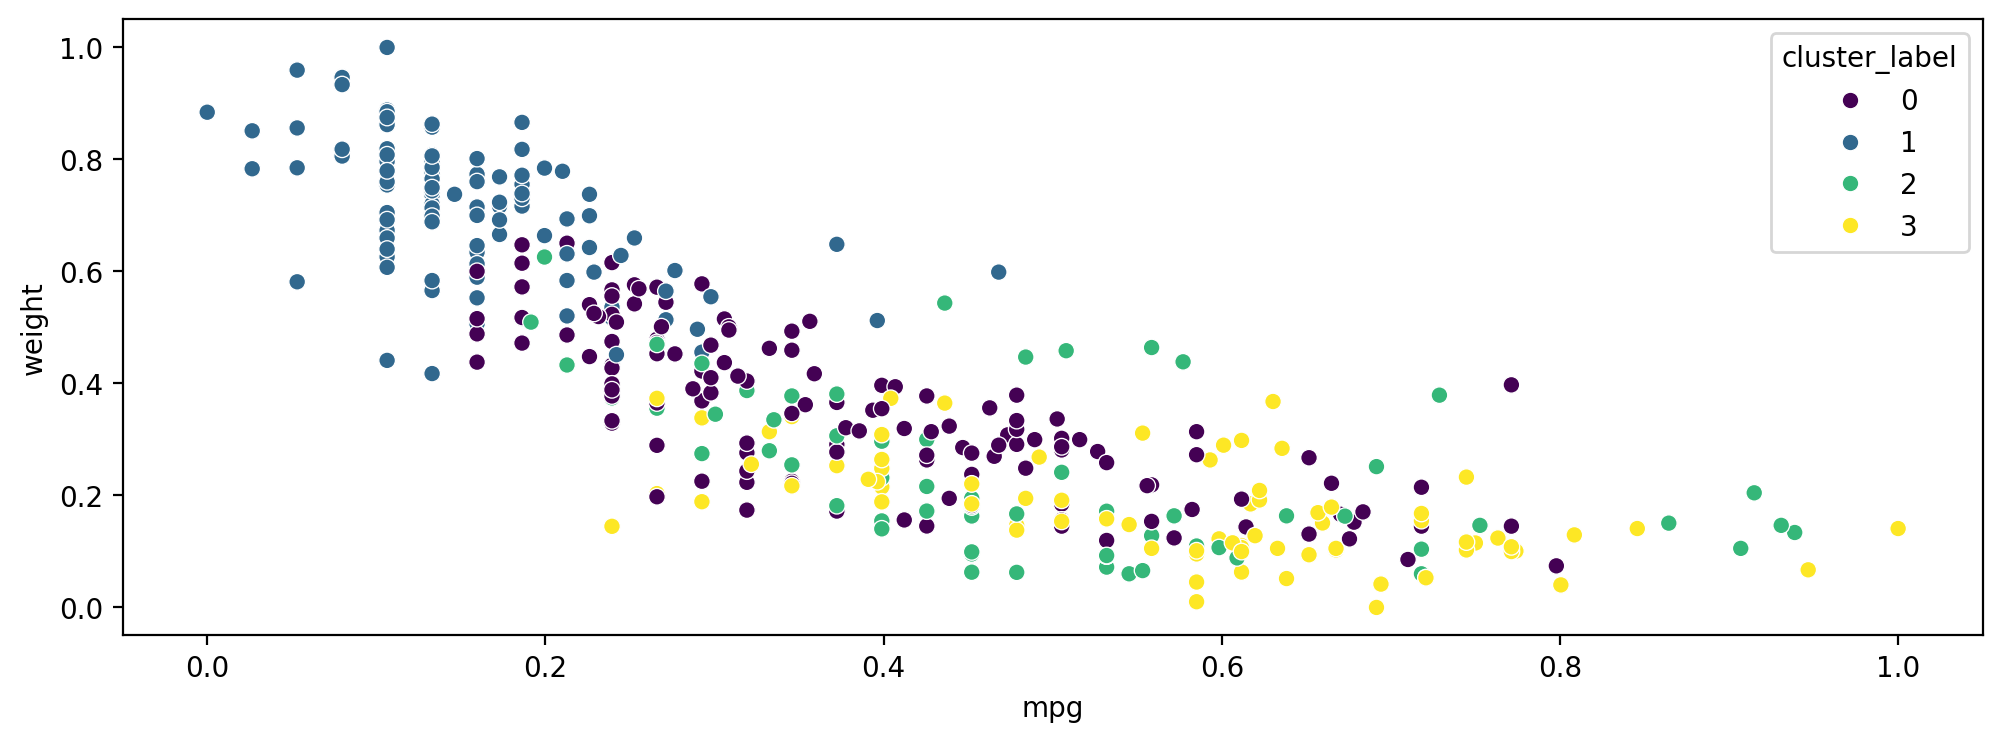

In [12]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=scaled_df, x='mpg', y='weight', hue='cluster_label', palette='viridis')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=None, distance_threshold=np.sqrt(11), linkage='ward')

cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 4, 0, 1, 1, 1,
       1, 1, 4, 3, 3, 3, 3, 0, 2, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       4, 2, 4, 4, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 2, 0, 0, 2, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 3, 3, 3, 3, 4, 0, 2, 0,
       0, 2, 4, 1, 3, 3, 1, 1, 1, 1, 3, 1, 0, 3, 4, 4, 4, 0, 2, 0, 2, 4,
       4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 4, 4, 4, 4,
       5, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 0, 2, 4, 2, 0, 1, 0, 4, 1, 4, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 1, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 1, 0, 4,
       4, 4, 4, 1, 0, 0, 2, 1, 5, 1, 0, 1, 5, 5, 5, 5, 0, 2, 1, 2, 0, 5,
       5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 1, 2, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       1, 2, 0, 0, 0, 5, 5, 5, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 4, 4, 2, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 0, 2, 2, 1, 5, 1, 5, 2, 2,

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

np.set_printoptions(suppress=True)

linked = linkage(scaled_df, method='ward')
linked

array([[ 67.        ,  68.        ,   0.0401977 ,   2.        ],
       [232.        , 234.        ,   0.0412867 ,   2.        ],
       [ 63.        ,  74.        ,   0.04316861,   2.        ],
       ...,
       [775.        , 777.        ,  14.88853851, 147.        ],
       [778.        , 779.        ,  15.32208423, 245.        ],
       [780.        , 781.        ,  34.58749649, 392.        ]])

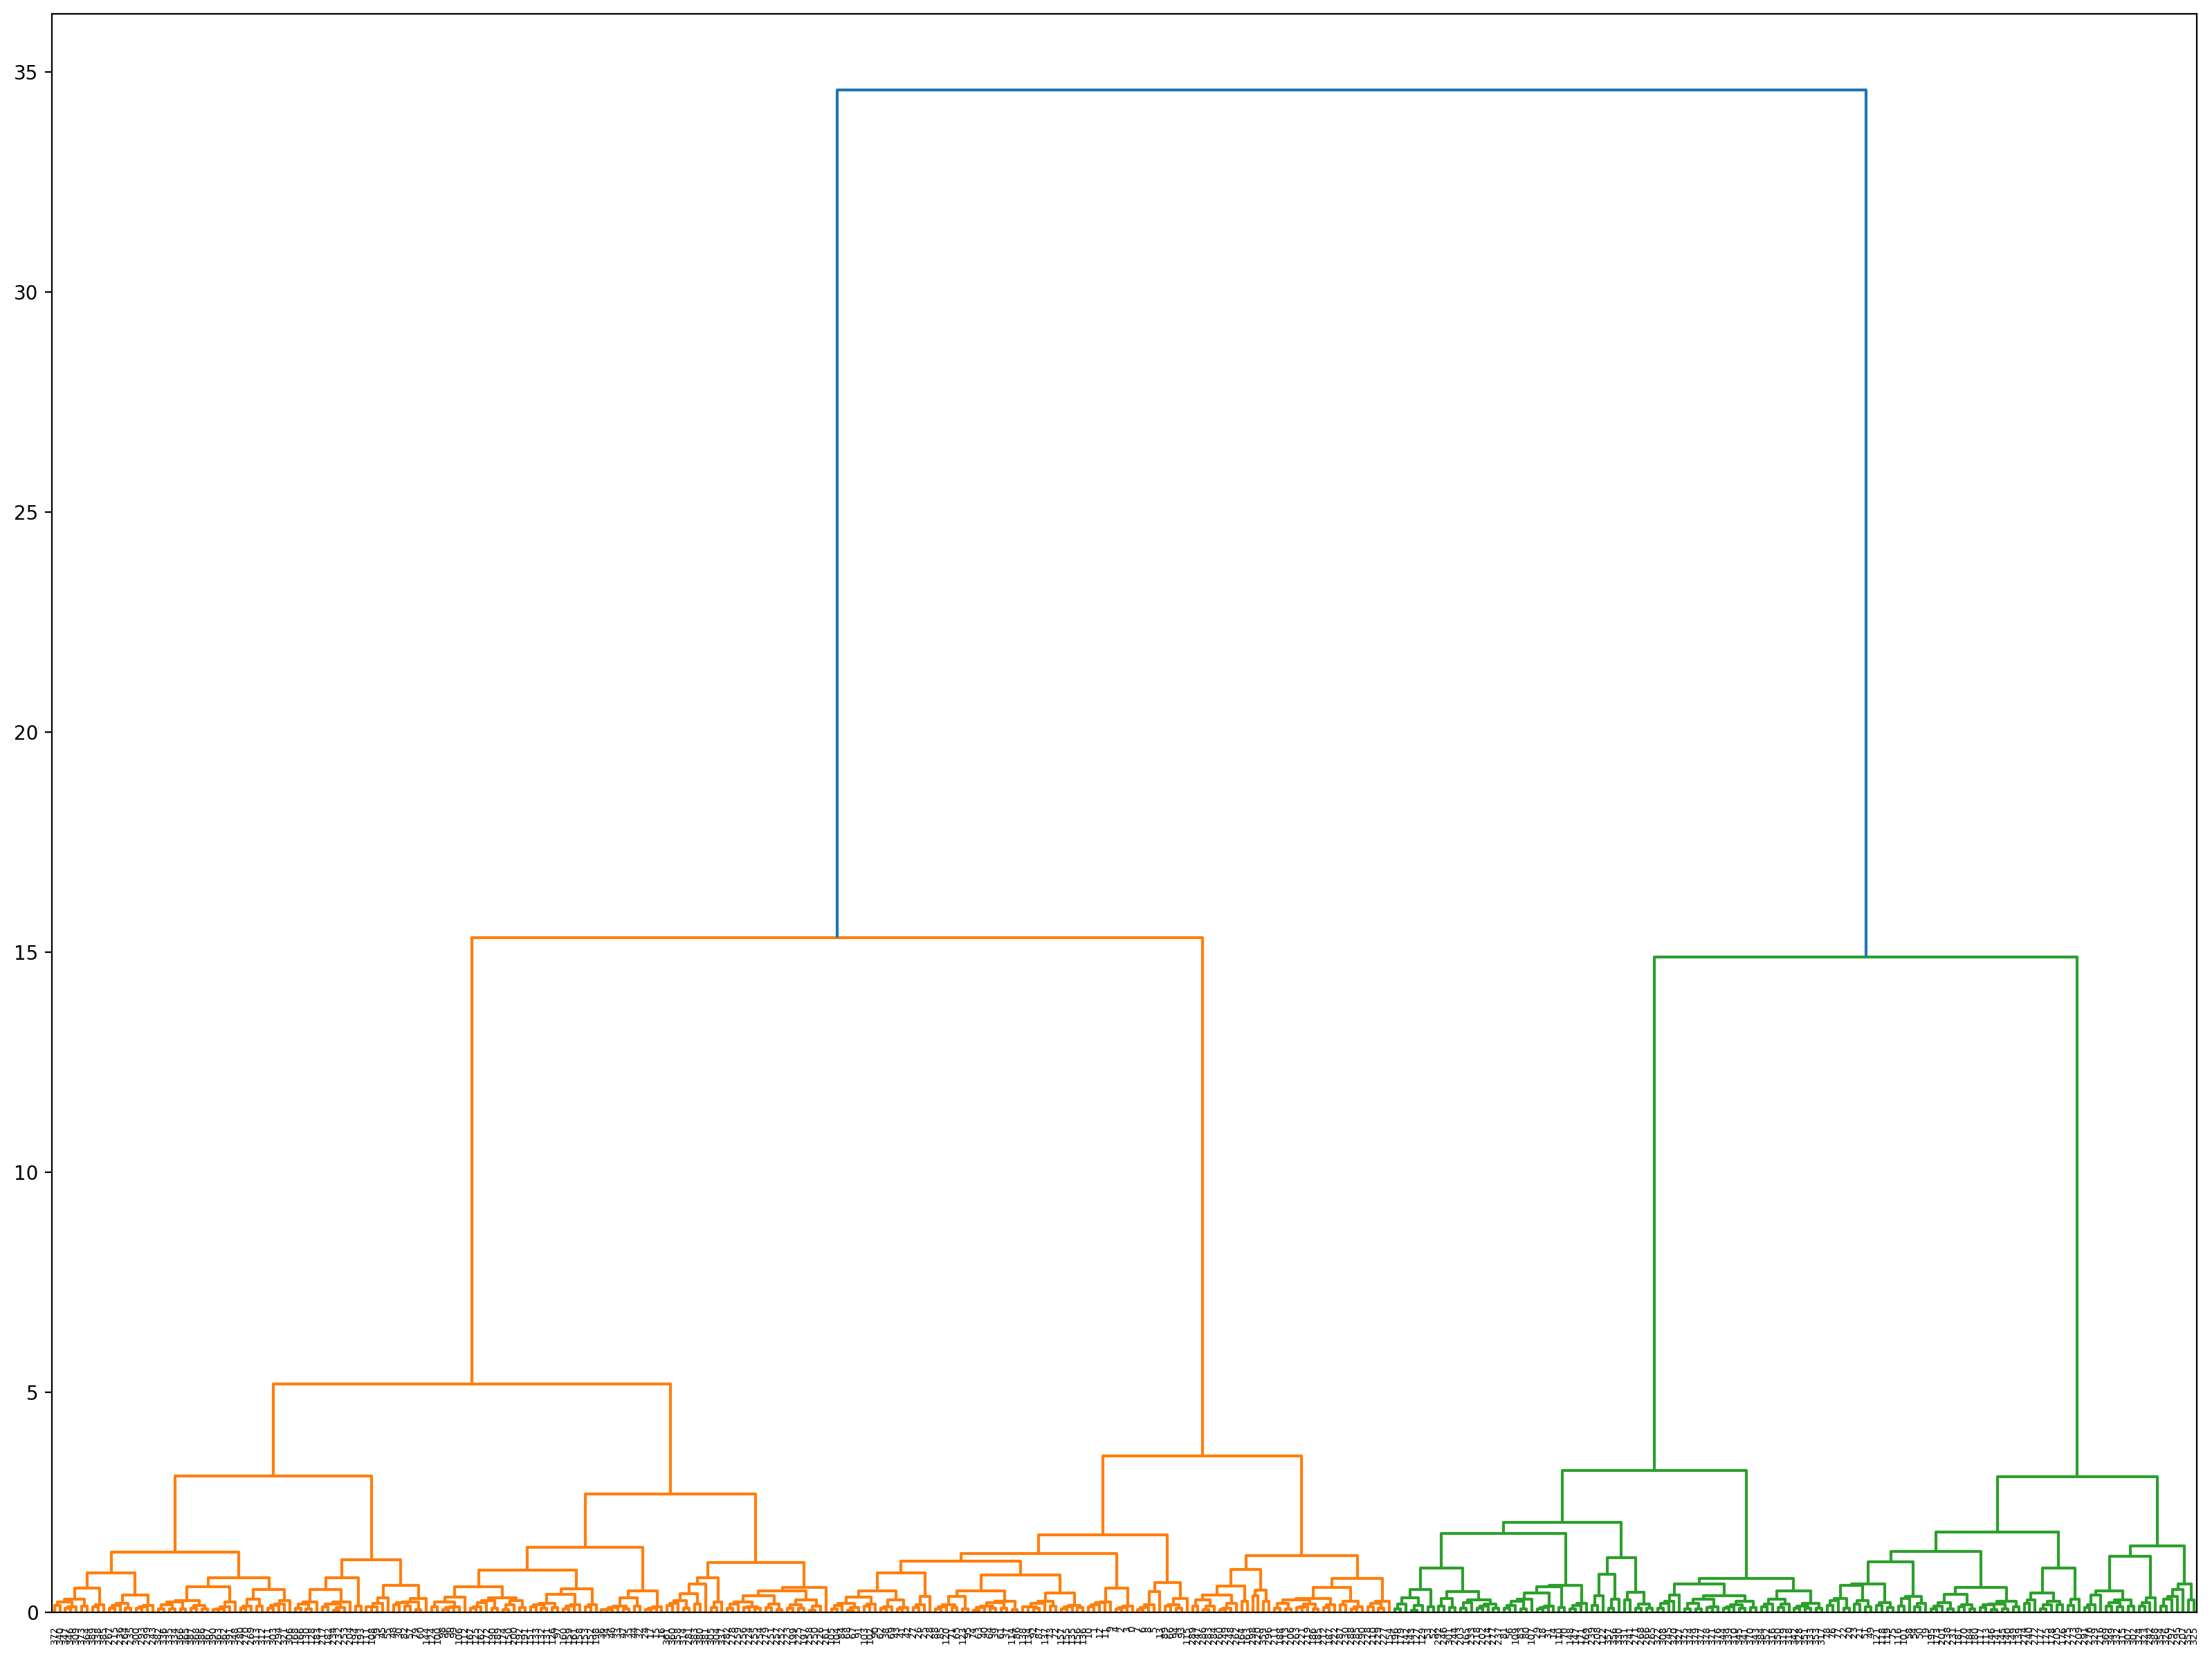

In [15]:
plt.figure(figsize=(20,15), dpi=200)
dendrogram(
    linked,
    orientation='top',
    labels=range(0, len(scaled_df)),
    distance_sort='descending'
)

plt.show()